# Chp2. Linear Regression in Tensorflow from Egressive

In [50]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

In [10]:

num_points = 1000
vectors_set = []
for i in xrange(num_points):
    x1 = np.random.normal(0.0, 0.55)
    y1 = x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
    vectors_set.append([x1, y1])

x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

#y = 0.1*x + 0.3

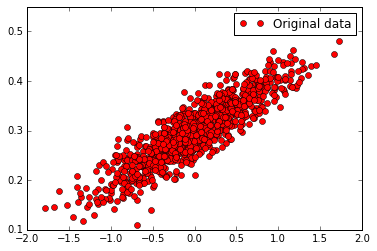

In [13]:
plt.plot(x_data, y_data, 'ro', label='Original data')
plt.legend()
plt.show()

## Cost function and gradient descent algorithm
cost function = error function
how "good" (actually as "bad) certain line is

In [28]:
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

# Cost function
loss = tf.reduce_mean(tf.square(y - y_data))

#Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(0.5) #Learning rate 0.5
train = optimizer.minimize(loss)

7 [ 0.07233696] [ 0.29974377]


//anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


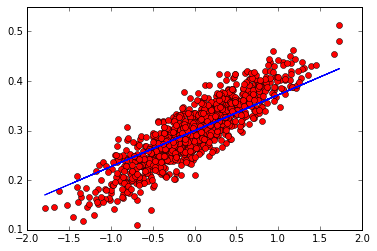

In [33]:
# Running the Algorithm
init = tf.initialize_all_variables() #initialize variables

sess = tf.Session()
sess.run(init)

# Running 8 iterations
for step in xrange(8):
    sess.run(train)
print step, sess.run(W), sess.run(b)

plt.plot(x_data, y_data, 'ro')
plt.plot(x_data, sess.run(W) * x_data + sess.run(b))
plt.legend()
plt.show()

In [35]:
# More runs gives better accuracy

print (step, sess.run(W), sess.run(b))
print(step, sess.run(loss))

(7, array([ 0.07233696], dtype=float32), array([ 0.29974377], dtype=float32))
(7, 0.0011377172)


## 3. Clustering in Tensorflow - Unsupervised Learning

Tensorflow는 기본 데이터 구조를 Tensor라고 불리우는 데이터로 표현함
Tensor: A dynamically-sized multidimensional data arrays that have as a properties a static data type, which can be from blooean or string to a variety of numeric types.

Rank의 개념도 있는데 기본적으로 rank
tensor 0: a scalar vector
tensor 1: a vector
tensor 2: a matrix

3 types of dimension:
Shape, Rank, Dimension Number


In [46]:
#Dimension expand

ryanshin = np.random.rand(2,2000)
vectors = tf.constant(ryanshin)
extended_vectors = tf.expand_dims(vectors, 0)
print extended_vectors.get_shape()

(1, 2, 2000)


Data Storage in Tensorflow
How to get data?
1. From data files: via internet
2. Data preloaded as constants or variables: constant using constnat / variable using variable
3. Those provided by Python code.: 

#K-means algorithm - High Cost (NP Problem)
3 Steps
Step0: Inital Step - determines initial set of K centroids
Step1: Allocation Step - assign each obseration to the nearest Group.
Step2: Update - 새로운 Centroid 계산하여 만들기

In [49]:
# Create 2D Space Code
num_puntos = 2000
conjunto_puntos = []
for i in xrange(num_puntos):
    if np.random.random():
        conjunto_puntos.append([np.random.normal(0.0, 0.9), np.random.normal(0.0, 0.9)])
    else:
        conjunto_puntos.append([np.random.normal(3.0, 0.5), np.random.normal(1.0, 0.5)])

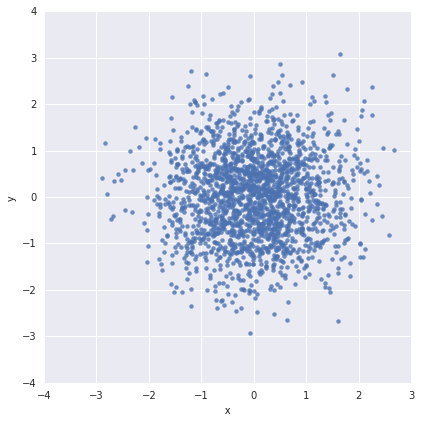

In [51]:
#Display point
df = pd.DataFrame({"x": [v[0] for v in conjunto_puntos],
                  "y": [v[1] for v in conjunto_puntos]})
sns.lmplot("x", "y", data=df, fit_reg=False, size=6)
plt.show()

In [56]:
vectors = tf.constant(conjunto_puntos)
k = 4
centroides = tf.Variable(tf.slice(tf.random_shuffle(vectors),[0,0],[k,-1]))

expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroides = tf.expand_dims(centroides, 1)

assignments = tf.argmin(tf.reduce_sum(tf.square(tf.sub(expanded_vectors, expanded_centroides)), 2), 0)

means = tf.concat(0, [tf.reduce_mean(tf.gather(vectors, tf.reshape(tf.where( tf.equal(assignments, c)),
                                                                   [1, -1])), reduction_indices=[1])
                     for c in xrange (k)])

update_centroides = tf.assign(centroides, means)

init_op = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init_op)

for step in xrange(100):
    _, centroide_values, assignment_values = sess.run([update_centroides, centroides, assignments])

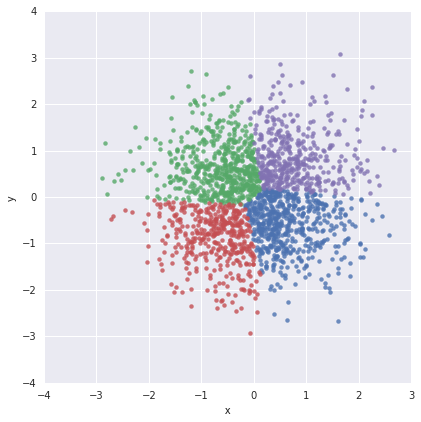

In [58]:
data = {"x": [], "y": [], "cluster": []}

for i in xrange(len(assignment_values)):
    data["x"].append(conjunto_puntos[i][0])
    data["y"].append(conjunto_puntos[i][1])
    data["cluster"].append(assignment_values[i])

df = pd.DataFrame(data)
sns.lmplot("x", "y", data=df, fit_reg=False, size=6, hue="cluster", legend=False)
plt.show()

In [63]:
#New Group
#move all our data to tensors.
vectors = tf.constant(conjunto_puntos)
# set initial centroids.
k = 4
centroides = tf.Variable(tf.slice(tf.random_shuffle(vectors), [0,0], [k, -1])) #Stored in 2D

print vectors.get_shape()
print centroides.get_shape()

(2000, 2)
(4, 2)


In [65]:
expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroides = tf.expand_dims(centroides, 1)

print expanded_vectors.get_shape()
print expanded_centroides.get_shape()

(1, 2000, 2)
(4, 1, 2)


In [66]:
#Squared Euclidena Distance:
diff = tf.sub(expanded_vectors, expanded_centroides)
sqr = tf.square(diff)
distances = tf.reduce_sum(sqr, 2)
assignemtns = tf.argmin(distances, 0)

In [68]:
assignemtns = tf.argmin(tf.reduce_sum(tf.square(tf.sub(expanded_vectors, expanded_centroides)), 2), 0)

In [69]:
# Computation of the new centroids
#Calc new centroids
means = tf.concat(0, [tf.reduce_mean(
            tf.gather(vectors,tf.reshape(tf.where (tf.equal(assignments, c))
                                        , [1,-1])), reduction_indices=[1])
                     for c in xrange(k)])

In [77]:
#initial Settings
num_vectors = 1000
num_clusters = 3
num_steps = 100

#Graph execution
update_centroides = tf.assign(centroides, means)
init_op = tf.initialize_all_variables() # 초기화

#start to run graph
sess = tf.Session()
sess.run(init_op)

for step in xrange(num_steps):
    _, centroid_values, assignment_values = sess.run(
            [update_centroides, centroides, assignments])
    
print centroid_values

[[ 0.87288606 -0.70371962]
 [ 0.50573939  0.62641209]
 [-0.73909545  0.91176766]
 [-0.68562162 -0.68933523]]
